In [1]:
import numpy as np
from sklearn.datasets import load_boston  # Built-in dataset (features like rooms, crime; target = house prices)
from sklearn.model_selection import train_test_split  # Split data for training/testing
from sklearn.preprocessing import StandardScaler  # Normalize features 
from sklearn.linear_model import LinearRegression  
import matplotlib.pyplot as plt  

# Step 1: Load and prepare dataset (like PHP/MyAdmin table: rows = houses, columns = features + price)
data = load_boston()  # Loads Boston Housing dataset (506 houses, 13 features, prices)
X = data.data  # Features (e.g., column 5 = average rooms, column 0 = crime rate)
y = data.target.reshape(-1, 1)  # Prices (target, reshape to column vector)

# Step 2: Normalize features (using norm concept from Day 1 to scale data)
scaler = StandardScaler()  # StandardScaler computes mean/std dev for each feature
X = scaler.fit_transform(X)  # Fit and transform: subtract mean, divide by std dev (prevents large features dominating)

# Step 3: Split data (80% train, 20% test; like validating PHP queries)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # random_state for reproducibility

# Step 4: Add bias column (intercept in regression; like adding a constant feature)
X_train_bias = np.c_ [np.ones((X_train.shape[0], 1)), X_train]  # np.c_ concatenates ones column (bias) to X_train
X_test_bias = np.c_ [np.ones((X_test.shape[0], 1)), X_test]  # Same for test set

# Step 5: Initialize weights (random for gradient descent; shape = (features + bias, 1))
m = X_train_bias.shape[0]  # Number of training examples
n = X_train_bias.shape[1]  # Number of features + bias
theta = np.random.randn(n, 1)  # Random weights (mean=0, std=1)

# Step 6: Gradient Descent parameters
learning_rate = 0.01  # Step size (too high = overshoot, too low = slow convergence)
n_iterations = 1000  # Number of steps
cost_history = []  # Track MSE for plotting

# Step 7: Gradient Descent loop (core optimization)
for iteration in range(n_iterations):
    y_pred = X_train_bias @ theta  # Predictions = X * theta (matrix multiplication from Day 2)
    residuals = y_pred - y_train  # Errors = predictions - actual
    cost = np.mean(residuals ** 2)  # MSE cost function (mean squared error)
    cost_history.append(cost)  # Save cost for plotting
    
    gradients = (2 / m) * X_train_bias.T @ residuals  # Gradient = (2/m) * X^T * errors (partial derivatives)
    theta = theta - learning_rate * gradients  # Update weights = weights - lr * gradients

# Step 8: Evaluate on test set
y_pred_test = X_test_bias @ theta  # Test predictions
mse_test = np.mean((y_pred_test - y_test) ** 2)  # Test MSE
print(f"Final MSE on Test Set: {mse_test}")

# Step 9: Compare with scikit-learn (for validation)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred_sklearn = model.predict(X_test)
mse_sklearn = np.mean((y_pred_sklearn - y_test) ** 2)
print(f"Scikit-learn MSE: {mse_sklearn}")

# Step 10: Visualization (attract recruiters: plot cost history)
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("MSE Cost")
plt.title("Gradient Descent Convergence")
plt.savefig('gradient_descent_convergence.png')  # Save for GitHub
plt.show()

ImportError: 
`load_boston` has been removed from scikit-learn since version 1.2.

The Boston housing prices dataset has an ethical problem: as
investigated in [1], the authors of this dataset engineered a
non-invertible variable "B" assuming that racial self-segregation had a
positive impact on house prices [2]. Furthermore the goal of the
research that led to the creation of this dataset was to study the
impact of air quality but it did not give adequate demonstration of the
validity of this assumption.

The scikit-learn maintainers therefore strongly discourage the use of
this dataset unless the purpose of the code is to study and educate
about ethical issues in data science and machine learning.

In this special case, you can fetch the dataset from the original
source::

    import pandas as pd
    import numpy as np

    data_url = "http://lib.stat.cmu.edu/datasets/boston"
    raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
    data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
    target = raw_df.values[1::2, 2]

Alternative datasets include the California housing dataset and the
Ames housing dataset. You can load the datasets as follows::

    from sklearn.datasets import fetch_california_housing
    housing = fetch_california_housing()

for the California housing dataset and::

    from sklearn.datasets import fetch_openml
    housing = fetch_openml(name="house_prices", as_frame=True)

for the Ames housing dataset.

[1] M Carlisle.
"Racist data destruction?"
<https://medium.com/@docintangible/racist-data-destruction-113e3eff54a8>

[2] Harrison Jr, David, and Daniel L. Rubinfeld.
"Hedonic housing prices and the demand for clean air."
Journal of environmental economics and management 5.1 (1978): 81-102.
<https://www.researchgate.net/publication/4974606_Hedonic_housing_prices_and_the_demand_for_clean_air>


Final MSE on Test Set: 0.5591679585656368
Scikit-learn MSE: 0.5558915986952442


FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\DAR\\ML_Projects\\linear_regression_gd\\linear_regression_gd\\gradient_descent_convergence.png'

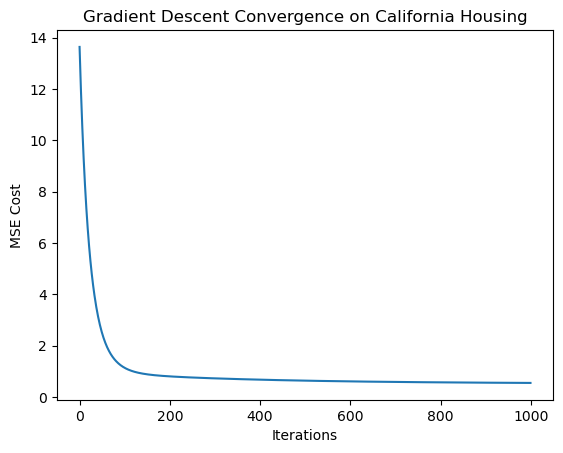

In [2]:
import numpy as np
from sklearn.datasets import fetch_california_housing  # California dataset (features: income, age; target: prices)
from sklearn.model_selection import train_test_split  # Split data
from sklearn.preprocessing import StandardScaler  # Normalize features
from sklearn.linear_model import LinearRegression  # Compare
import matplotlib.pyplot as plt  # Visualize

# Step 1: Load and prepare dataset (like PHP/MyAdmin table: rows = houses, columns = features + price)
data = fetch_california_housing()  # Loads dataset (20640 samples, 8 features)
X = data.data  # Features (e.g., MedInc, HouseAge)
y = data.target.reshape(-1, 1)  # Prices (target, reshape to column vector)

# Step 2: Normalize features (scale data, like Day 1 norm)
scaler = StandardScaler()  # Computes mean/std dev for each feature
X = scaler.fit_transform(X)  # Subtract mean, divide by std dev

# Step 3: Split data (80% train, 20% test; like PHP query validation)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)  # Reproducible split

# Step 4: Add bias column (intercept for regression)
X_train_bias = np.c_[np.ones((X_train.shape[0], 1)), X_train]  # Concatenate ones for bias
X_test_bias = np.c_[np.ones((X_test.shape[0], 1)), X_test]  # Same for test

# Step 5: Initialize weights (random for gradient descent)
m = X_train_bias.shape[0]  # Training samples (16512)
n = X_train_bias.shape[1]  # Features + bias (9)
theta = np.random.randn(n, 1)  # Random weights (mean=0, std=1)

# Step 6: Gradient Descent parameters
learning_rate = 0.01  # Step size
n_iterations = 1000  # Iterations for convergence
cost_history = []  # Track MSE

# Step 7: Gradient Descent loop (optimize weights)
for iteration in range(n_iterations):
    y_pred = X_train_bias @ theta  # Predictions = X * theta (matrix multiplication, Day 2)
    residuals = y_pred - y_train  # Errors
    cost = np.mean(residuals ** 2)  # Mean Squared Error (MSE)
    cost_history.append(cost)  # Save for plotting
    
    gradients = (2 / m) * X_train_bias.T @ residuals  # Gradient (partial derivatives)
    theta = theta - learning_rate * gradients  # Update weights

# Step 8: Evaluate on test set
y_pred_test = X_test_bias @ theta  # Test predictions
mse_test = np.mean((y_pred_test - y_test) ** 2)  # Test MSE
print(f"Final MSE on Test Set: {mse_test}")

# Step 9: Compare with scikit-learn
model = LinearRegression()  # Industry-standard model
model.fit(X_train, y_train)  # Fit on train data
y_pred_sklearn = model.predict(X_test)  # Predict
mse_sklearn = np.mean((y_pred_sklearn - y_test) ** 2)  # Sklearn MSE
print(f"Scikit-learn MSE: {mse_sklearn}")

# Step 10: Visualize convergence (recruiter appeal)
plt.plot(cost_history)
plt.xlabel("Iterations")
plt.ylabel("MSE Cost")
plt.title("Gradient Descent Convergence on California Housing")
plt.savefig('linear_regression_gd/gradient_descent_convergence.png')  # Save for GitHub
plt.show()